# Base
## Estimation of Obesity Levels Based On Eating Habits and Physical Condition

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

## Perguntas?
- Metas mínimas para manter qualidade de vida (atividade física, alimentação, consumo de bebidas, etc)
- Quais fatores mais contribuem para o desenvolvimento da obesidade (por exemplo, histórico familiar, consumo de alimentos calóricos, ou hábitos de transporte)?
- Identificar grupos padrões de comportamento similares em relação à alimentação, atividade física, uso de tecnologia, nível de obesidade 

### Dicionario:

- Gender = Gênero
- Age = Idade
- Height = Altura (metros)
- Weight = Peso (Kilogramas)
- Family_history_with_overweight = Possui um membro da família que sofreu ou sofre de sobrepeso?
- FAVC =  Você consome comidas hipercalóricas frequentemente?
- FCVC = você consome vegetais com frequência nas suas refeições?
- NCP = Quantas refeições principais você faz por dia?
- CAEC = Você consome alguma comida entre refeições?
- SMOKE = Você fuma?
- CH2O = Quanto de água você bebe por dia?
- SCC = Você monitora as calorias que você consome diariamente?
- FAF = Quanto tempo você usa aparelhos tecnológicos como celular, videogame, televisão
        computador entre outros?
- CALC = Com que frequência você bebe álcool?
- MTRANS = Que tipo de transporte você geralmente usa?
- NObeyesdad = Level de obesidade

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [46]:
df = pd.read_csv('../projeto_datasicence_coderhouse/dados/ObesityDataSet_raw_and_data_sinthetic.csv')
df.reset_index(drop=False, inplace=True)
df.rename(columns={'index': 'ID'}, inplace=True)
df['ID'] = df['ID'].astype(str)
df

,ID,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [47]:
print(df.isnull().sum())
print(df.describe())

ID                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.00000

In [48]:
df.loc[1]

ID                                                    1
Gender                                           Female
Age                                                21.0
Height                                             1.52
Weight                                             56.0
family_history_with_overweight                      yes
FAVC                                                 no
FCVC                                                3.0
NCP                                                 3.0
CAEC                                          Sometimes
SMOKE                                               yes
CH2O                                                3.0
SCC                                                 yes
FAF                                                 3.0
TUE                                                 0.0
CALC                                          Sometimes
MTRANS                            Public_Transportation
NObeyesdad                                Normal

### Transformando Variáveis Qualitativas em Quantitativas

In [49]:
df['Smoker'] = df['SMOKE'].map({'no': 0, 'yes': 1})
df['Alcohol'] = df['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df['Food Bt Meals'] = df['CAEC'].map({'no': 3, 'Sometimes': 2, 'Frequently': 1, 'Always': 0})
df['Mobility'] = df['MTRANS'].map({'Bike': 0, 'Walking': 0, 'Public_Transportation': 0.5, 'Automobile': 1, 'Motorbike': 1}) # nível de atividade física para deslocamento
df['Obesity F'] = df['family_history_with_overweight'].map({'no': 0, 'yes': 1})
df['Bad Food'] = df['FAVC'].map({'no': 0, 'yes': 1}) # "Frequent consumption of high caloric food between meals"
df['Calories Control'] = df['SCC'].map({'no': 1, 'yes': 0}) # "Self control of eating habits"
df['FAF'] = df['FAF'] * - 1 # O valor é negativo, pois a ideia é que a atividade física seja inversamente proporcional à obesidade
df['Habits'] = sum([df['FCVC'], df['NCP'], df['CH2O'], df['FAF'], df['TUE'], df['Alcohol'], df['Smoker'], df['Food Bt Meals'], df['Mobility'], df['Obesity F'], df['Bad Food'], df['Calories Control']]) # aqui vamos somar todas as variáveis continuas que representam hábitos do cotidiano
df.head()

,ID,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,MTRANS,NObeyesdad,Smoker,Alcohol,Food Bt Meals,Mobility,Obesity F,Bad Food,Calories Control,Habits
0,0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,...,Public_Transportation,Normal_Weight,0,0,2,0.5,1,0,1,12.5
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,...,Public_Transportation,Normal_Weight,1,1,2,0.5,1,0,0,11.5
2,2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,...,Public_Transportation,Normal_Weight,0,2,2,0.5,1,0,1,12.5
3,3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,...,Walking,Overweight_Level_I,0,2,2,0.0,0,0,1,11.0
4,4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,...,Public_Transportation,Overweight_Level_II,0,1,2,0.5,0,0,1,9.5


In [50]:
df.describe(include=['object'])

,ID,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2111,2,2,2,4,2,2,4,5,7
top,2110,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1,1068,1726,1866,1765,2067,2015,1401,1580,351


In [51]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.313,6.346,14.00,19.947,22.778,26.000,61.00
Height,2111.0,1.702,0.093,1.45,1.630,1.700,1.768,1.98
Weight,2111.0,86.586,26.191,39.00,65.473,83.000,107.431,173.00
FCVC,2111.0,2.419,0.534,1.00,2.000,2.386,3.000,3.00
NCP,2111.0,2.686,0.778,1.00,2.659,3.000,3.000,4.00
CH2O,2111.0,2.008,0.613,1.00,1.585,2.000,2.477,3.00
FAF,2111.0,-1.010,0.851,-3.00,-1.667,-1.000,-0.125,-0.00
TUE,2111.0,0.658,0.609,0.00,0.000,0.625,1.000,2.00
Smoker,2111.0,0.021,0.143,0.00,0.000,0.000,0.000,1.00
Alcohol,2111.0,0.731,0.515,0.00,0.000,1.000,1.000,3.00


### Análise Multivariada

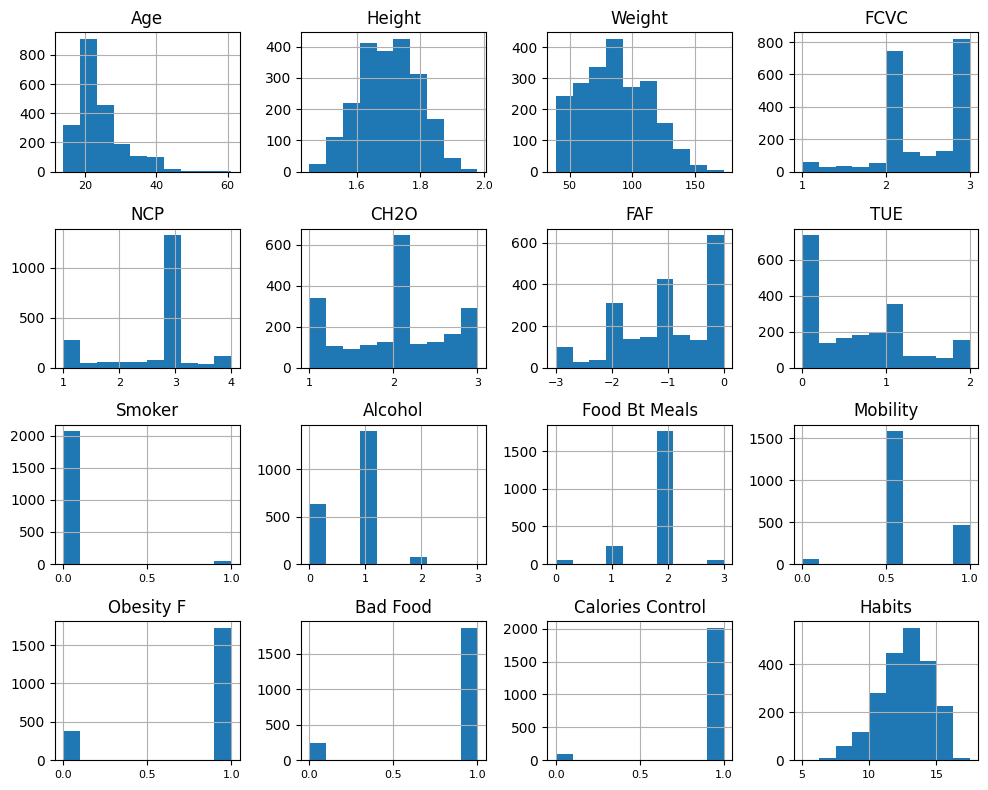

In [52]:
df.hist(figsize=(10,8), xlabelsize=8)
plt.tight_layout()

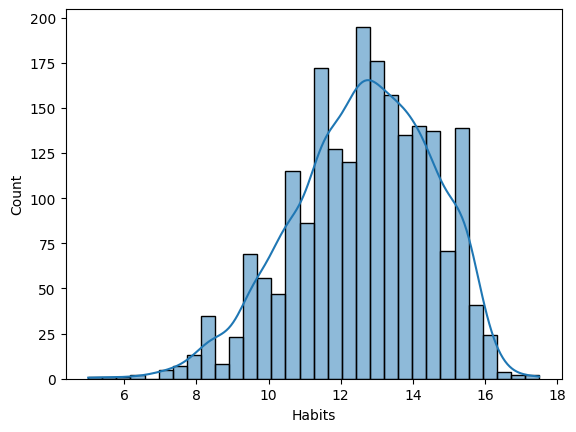

In [53]:
sns.histplot(df['Habits'], kde=True)
plt.show()

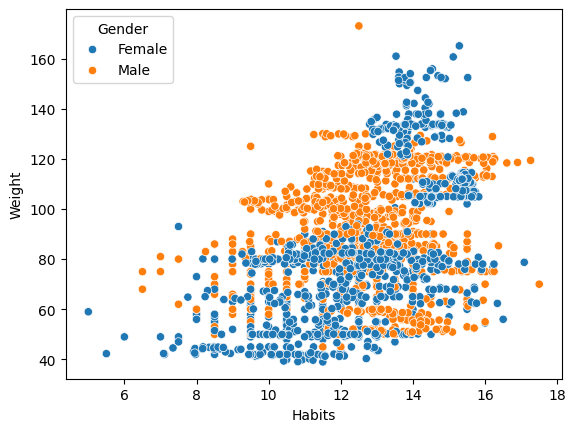

In [59]:
sns.scatterplot(x='Habits', y='Weight',hue='Gender', data=df)
plt.show()